In [1]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import os
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
os.chdir(R"C:\Users\kmras\OneDrive\Desktop\pYTHON\Linear Regression\Case_2-20220703T170551Z-001\Case_2")
os.getcwd()
os.listdir()

['Kaggle_Weather in Szeged.pdf',
 'weatherHistory.csv',
 'WeatherHistory_Case.py']

In [3]:
data=pd.read_csv("weatherHistory.csv")
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [5]:
(data.duplicated()==1).sum()

24

In [6]:
data.drop_duplicates(inplace=True)
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [249]:
(data.duplicated()==1).sum()

0

In [248]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96429.000000,96429.000000,96429.000000,96429.000000,96429.000000,96429.000000,96429.0,96429.000000
mean,11.929692,10.851707,0.734902,10.812460,187.497506,10.347225,0.0,1003.232915
std,9.550492,10.695743,0.195466,6.913345,107.376423,4.192548,0.0,116.984300
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.683333,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [250]:
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [251]:
(data["Precip Type"].isnull().sum()/len(data["Precip Type"]))*100

0.5361457652780802

In [252]:
data_corrected=data.dropna(subset=["Precip Type"])

In [253]:
data_corrected.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [254]:
data_corrected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95912 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            95912 non-null  object 
 1   Summary                   95912 non-null  object 
 2   Precip Type               95912 non-null  object 
 3   Temperature (C)           95912 non-null  float64
 4   Apparent Temperature (C)  95912 non-null  float64
 5   Humidity                  95912 non-null  float64
 6   Wind Speed (km/h)         95912 non-null  float64
 7   Wind Bearing (degrees)    95912 non-null  float64
 8   Visibility (km)           95912 non-null  float64
 9   Loud Cover                95912 non-null  float64
 10  Pressure (millibars)      95912 non-null  float64
 11  Daily Summary             95912 non-null  object 
dtypes: float64(8), object(4)
memory usage: 9.5+ MB


In [255]:
data_corrected.drop(columns=["Formatted Date","Loud Cover","Daily Summary"],inplace=True)

In [256]:
data_corrected

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


<Figure size 576x576 with 0 Axes>

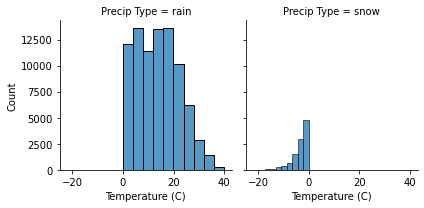

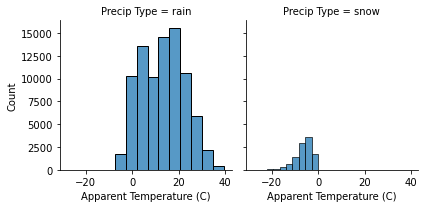

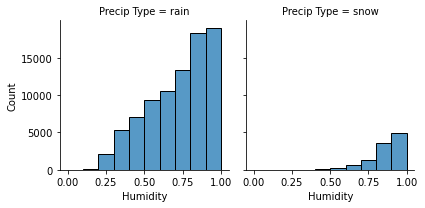

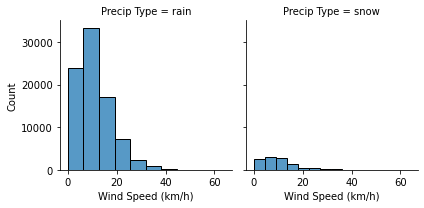

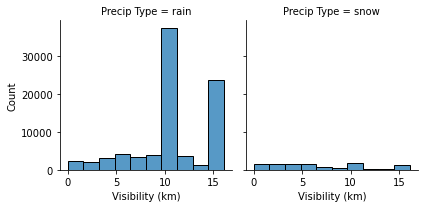

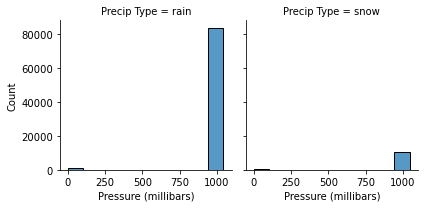

In [257]:
plt.figure(figsize=(8,8))

fg=sns.FacetGrid(data_corrected,col="Precip Type")
fg.map(sns.histplot,"Temperature (C)",bins=10)
plt.show()

fg=sns.FacetGrid(data_corrected,col="Precip Type")
fg.map(sns.histplot,"Apparent Temperature (C)",bins=10)
plt.show()

fg=sns.FacetGrid(data_corrected,col="Precip Type")
fg.map(sns.histplot,"Humidity",bins=10)
plt.show()

fg=sns.FacetGrid(data_corrected,col="Precip Type")
fg.map(sns.histplot,"Wind Speed (km/h)",bins=10)
plt.show()

fg=sns.FacetGrid(data_corrected,col="Precip Type")
fg.map(sns.histplot,"Visibility (km)",bins=10)
plt.show()

fg=sns.FacetGrid(data_corrected,col="Precip Type")
fg.map(sns.histplot,"Pressure (millibars)",bins=10)
plt.show()

In [307]:
display(data_corrected.groupby("Precip Type").mean())

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Precip Type,,,,,,,
rain,13.850150,13.010274,0.718698,10.973324,189.110352,10.830734,1002.760974
snow,-3.270885,-6.249847,0.863263,9.481998,174.754294,6.636570,1006.216970


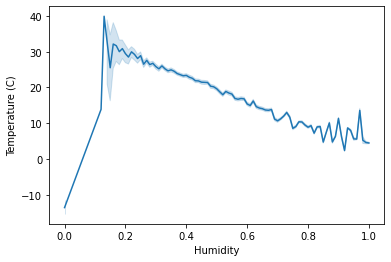

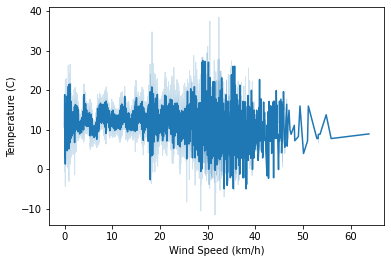

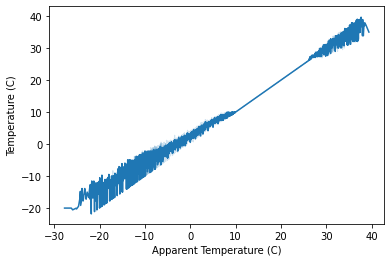

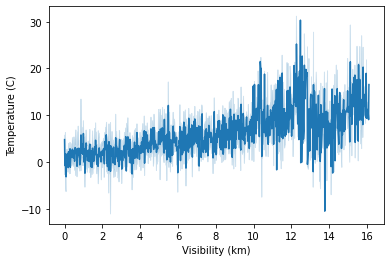

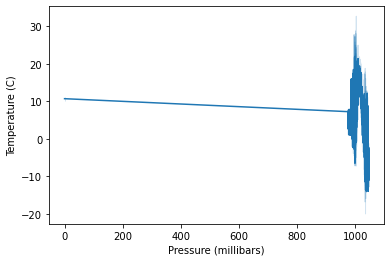

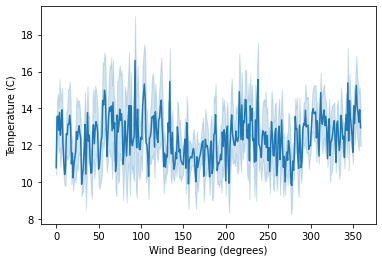

In [306]:
sns.lineplot(data_corrected["Humidity"],data_corrected["Temperature (C)"])
plt.show()

sns.lineplot(data_corrected["Wind Speed (km/h)"],data_corrected["Temperature (C)"])
plt.show()

sns.lineplot(data_corrected["Apparent Temperature (C)"],data_corrected["Temperature (C)"])
plt.show()

sns.lineplot(data_corrected["Visibility (km)"],data_corrected["Temperature (C)"])
plt.show()

sns.lineplot(data_corrected["Pressure (millibars)"],data_corrected["Temperature (C)"])
plt.show()

sns.lineplot(data_corrected["Wind Bearing (degrees)"],data_corrected["Temperature (C)"])
plt.show()

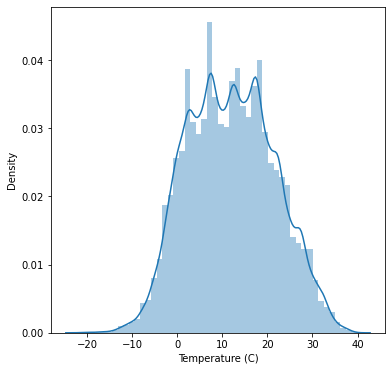

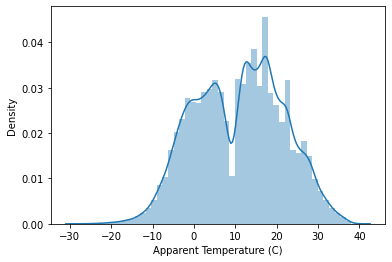

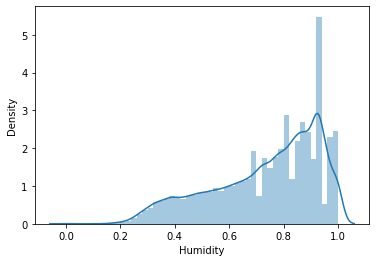

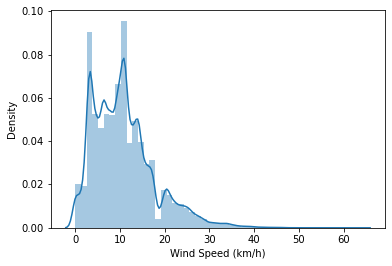

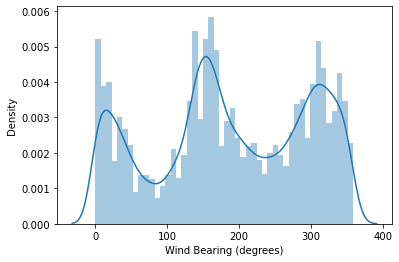

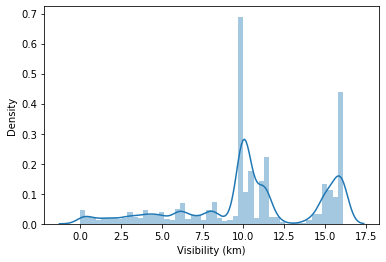

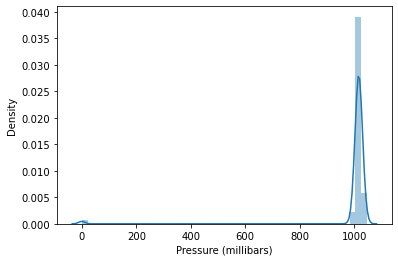

In [115]:
plt.figure(figsize=(6,6))

sns.distplot(data_corrected["Temperature (C)"])
plt.show()


sns.distplot(data_corrected["Apparent Temperature (C)"])
plt.show()

sns.distplot(data_corrected["Humidity"])
plt.show()

sns.distplot(data_corrected["Wind Speed (km/h)"])
plt.show()


sns.distplot(data_corrected["Wind Bearing (degrees)"])
plt.show()

sns.distplot(data_corrected["Visibility (km)"])
plt.show()

sns.distplot(data_corrected["Pressure (millibars)"])
plt.show()

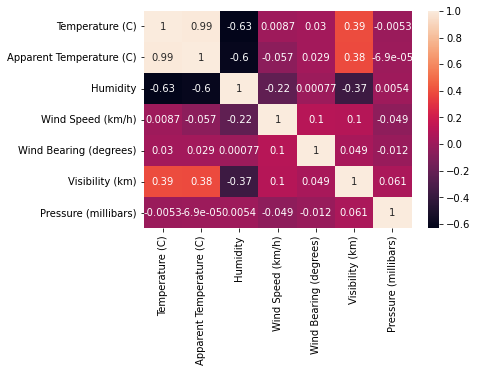

In [259]:
corr=data_corrected.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [260]:
data_corrected.columns.get_loc("Temperature (C)")

2

In [261]:
dependent_variable=list(data_corrected.columns).pop(data_corrected.columns.get_loc("Temperature (C)"))
dependent_variable

'Temperature (C)'

In [262]:
y=data_corrected.loc[:,dependent_variable]
y

0         9.472222
1         9.355556
2         9.377778
3         8.288889
4         8.755556
           ...    
96448    26.016667
96449    24.583333
96450    22.038889
96451    21.522222
96452    20.438889
Name: Temperature (C), Length: 95912, dtype: float64

In [263]:
X=data_corrected.drop(columns=["Temperature (C)"])
X

,Summary,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,Partly Cloudy,rain,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,Partly Cloudy,rain,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,Partly Cloudy,rain,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [264]:
(data_corrected["Summary"].value_counts()/len(data))*100

Partly Cloudy                          32.799262
Mostly Cloudy                          28.947723
Overcast                               17.127628
Clear                                  11.143950
Foggy                                   7.380560
Breezy and Overcast                     0.547553
Breezy and Mostly Cloudy                0.535109
Breezy and Partly Cloudy                0.400295
Dry and Partly Cloudy                   0.089185
Windy and Partly Cloudy                 0.069481
Light Rain                              0.065333
Breezy                                  0.056000
Windy and Overcast                      0.046666
Humid and Mostly Cloudy                 0.041481
Drizzle                                 0.040444
Breezy and Foggy                        0.036296
Windy and Mostly Cloudy                 0.036296
Dry                                     0.035259
Humid and Partly Cloudy                 0.017630
Dry and Mostly Cloudy                   0.014518
Rain                

In [265]:
X["Summary"]=np.where(X["Summary"].isin(["Partly Cloudy", "Mostly Cloudy","Overcast","Clear"]),X["Summary"],"Others")

In [266]:
X["Summary"].value_counts()

Partly Cloudy    31628
Mostly Cloudy    27914
Overcast         16516
Clear            10746
Others            9108
Name: Summary, dtype: int64

In [267]:
X=pd.get_dummies(X,columns=["Summary","Precip Type"])

In [268]:
X.drop(columns=["Summary_Partly Cloudy","Precip Type_snow"],inplace=True)

In [269]:
X

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Clear,Summary_Mostly Cloudy,Summary_Others,Summary_Overcast,Precip Type_rain
0,7.388889,0.89,14.1197,251.0,15.8263,1015.13,0,0,0,0,1
1,7.227778,0.86,14.2646,259.0,15.8263,1015.63,0,0,0,0,1
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0,1,0,0,1
3,5.944444,0.83,14.1036,269.0,15.8263,1016.41,0,0,0,0,1
4,6.977778,0.83,11.0446,259.0,15.8263,1016.51,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
96448,26.016667,0.43,10.9963,31.0,16.1000,1014.36,0,0,0,0,1
96449,24.583333,0.48,10.0947,20.0,15.5526,1015.16,0,0,0,0,1
96450,22.038889,0.56,8.9838,30.0,16.1000,1015.66,0,0,0,0,1
96451,21.522222,0.60,10.5294,20.0,16.1000,1015.95,0,0,0,0,1


In [270]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [271]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] =[variance_inflation_factor(X_train.values, j) for j in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif.round(1)

,VIF Factor,features
0,4.8,Apparent Temperature (C)
1,22.7,Humidity
2,4.1,Wind Speed (km/h)
3,4.1,Wind Bearing (degrees)
4,11.6,Visibility (km)
5,33.9,Pressure (millibars)
6,1.4,Summary_Clear
7,2.0,Summary_Mostly Cloudy
8,2.0,Summary_Others
9,1.9,Summary_Overcast


In [272]:
X_train=X_train.drop(columns=["Pressure (millibars)","Precip Type_rain","Visibility (km)","Humidity"])

In [274]:
vif = pd.DataFrame()
vif["VIF Factor"] =[variance_inflation_factor(X_train.values, j) for j in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif.round(1)

,VIF Factor,features
0,1.9,Apparent Temperature (C)
1,3.0,Wind Speed (km/h)
2,3.1,Wind Bearing (degrees)
3,1.2,Summary_Clear
4,1.6,Summary_Mostly Cloudy
5,1.3,Summary_Others
6,1.4,Summary_Overcast


In [275]:
X_test=X_test.drop(columns=["Pressure (millibars)","Precip Type_rain","Visibility (km)","Humidity"])

In [276]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [277]:
y_pred=regression.predict(X_test)

In [279]:
regression.score(X_train,y_train)

0.9897858973589017

In [280]:
regression.score(X_test,y_test)

0.9899325620861553

In [281]:
X_train1=sm.add_constant(X_train)
X_test1=sm.add_constant(X_test)

In [282]:
X_train1=pd.DataFrame(X_train1)

In [283]:
model=sm.OLS(y_train,X_train1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 9.293e+05
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:09:52   Log-Likelihood:                -92933.
No. Observations:               67138   AIC:                         1.859e+05
Df Residuals:                   67130   BIC:                         1.860e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.5525      0.012    129.612      0.000       1.529       1.576
Apparent Temperature (C)     0.8856      0.000   2315.155      0.000       0.885       0.886
Wind Speed (km/h)            0.0932      0.001    169.360      0.000       0.092       0.094
Wind Bearing (degrees)      -0.0005   3.49e-05    -15.309      0.000      -0.001      -0.000
Summary_Clear               -0.0677      0.013     -5.178      0.000      -0.093      -0.042
Summary_Mostly Cloudy       -0.1742      0.010    -18.170      0.000      -0.193      -0.155
Summary_Others              -0.4903      0.015    -33.225      0.000      -0.519      -0.461
Summary_Overcast            -0.1942      0.012    -16.503      0.000      -0.217      -0.171
==============================================================================
Omnibus:                      708.809   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              940.575
Skew:                          -0.157   Prob(JB):                    5.71e-205
Kurtosis:                       3.488   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [286]:
print(regression.coef_)

print("\n")

print(regression.intercept_)

[ 8.85576807e-01  9.31913885e-02 -5.34609894e-04 -6.77247407e-02
 -1.74190684e-01 -4.90308410e-01 -1.94179462e-01]


1.5525495450082936


In [289]:
y_test_pred=pd.concat([pd.DataFrame(y_test.reset_index().drop(columns=["index"])),pd.DataFrame(y_pred)],axis=1)

In [290]:
y_test_pred=y_test_pred.rename(columns={"Temperature (C)":"Actual Temperature (C)",0:"Predicted Temperature (C)"})
y_test_pred

,Actual Temperature (C),Predicted Temperature (C)
0,16.605556,16.804096
1,18.961111,19.371927
2,5.766667,5.066436
3,1.350000,0.942173
4,15.533333,15.433939
...,...,...
28769,28.933333,26.884286
28770,22.627778,22.743825
28771,18.866667,19.713284
28772,-6.238889,-6.624287


In [303]:
from sklearn.metrics import r2_score
print("R2 :" + str(r2_score(y_test,y_pred)))

print("\n")

from sklearn.metrics import mean_absolute_error
print("MAE :" + str(mean_absolute_error(y_test,y_pred)))

print("\n")

from sklearn.metrics import mean_squared_error
print("MSE :" + str(mean_squared_error(y_test,y_pred)))

print("\n")

from sklearn.metrics import mean_absolute_percentage_error
print("MAPE :" + str(mean_absolute_percentage_error(y_test,y_pred)))

print("\n")

R2 :0.9899325620861553


MAE :0.7514411035401882


MSE :0.9274333088180466


MAPE :16682753084448.756




In [292]:
df=pd.DataFrame(X_train.columns)
df1=pd.DataFrame(np.transpose(regression.coef_))
df=df.rename(columns={0:"Variables"})
df1=df1.rename(columns={0:"Coefficients"})

In [293]:
df_variable_coefficients = pd.concat([df,df1], axis = 1)
df_variable_coefficients

,Variables,Coefficients
0,Apparent Temperature (C),0.885577
1,Wind Speed (km/h),0.093191
2,Wind Bearing (degrees),-0.000535
3,Summary_Clear,-0.067725
4,Summary_Mostly Cloudy,-0.174191
5,Summary_Others,-0.490308
6,Summary_Overcast,-0.194179
